In [41]:
#importing neccesary libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import time

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [42]:
#preproccesing the images
def load_and_process_image(image_path):
  img = load_img(image_path)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  return img


In [43]:
#now we are defining a deproccess function that will take the input and perfrom the opposite of preprocessing

def depreprocess(img):
  img = img.copy()
  img[:, :, 0] += 103.939
  img[:, :, 1] += 116.779
  img[:, :, 2] += 123.68
  img = img[:, :, ::-1]

  img = np.clip(img, 0, 255).astype('uint8')
  return img

def display_image(image):
  if len(image.shape) == 4:
    img = np.squeeze(image, axis=0)
  img = depreprocess(img)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  return

In [44]:
#definnig content path
content_path = '/content/main.png'
#definnig style path
style_path = '/content/ANG Studio.jpg'


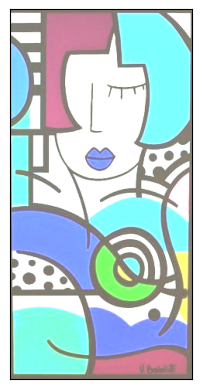

In [45]:


style_image = load_and_process_image(style_path)
display_image(style_image)

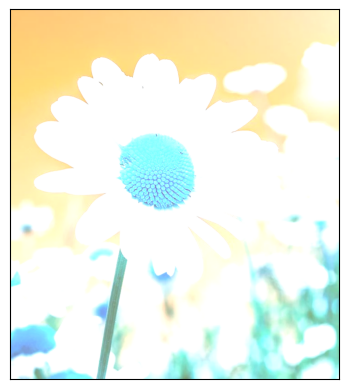

In [46]:
main_image = load_and_process_image(content_path)
display_image(main_image)

In [47]:
#initialisng the model

model = VGG19(
    include_top = False,
    weights= 'imagenet'
)

In [48]:
model.trainable = False
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [49]:
#definig the content and style model
content_layer = 'block5_conv2'

content_model = Model(
    inputs = model.input,
    outputs = model.get_layer(content_layer).output
)
#it will take the model input as its own input and will output the feature map from block5_conv1 layer


In [50]:
content_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 15,304,768 (58.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15,304,768 (58.38 MB)

In [51]:
#style_mdodel defining
style_layers = [
    'block1_conv1',
    'block3_conv1',
    'block5_conv1'
]
style_model = [Model(name='style', inputs=model.input, outputs=[model.get_layer(name).output for name in style_layers])]


In [52]:
#definnig the content loss
def content_loss(content_img, generated_img):
  ac = content_model(content_img)
  ag = content_model(generated_img)
  loss =  tf.reduce_mean(tf.square(ac - ag))
  return loss


In [53]:
#defining the gram matrix
def gram_matrix(A):
  channel = int(A.shape[-1])
  a = tf.reshape(A, [-1, channel])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram/tf.cast(n, tf.float32)

weight_of_layer = 1. / len(style_layers)

In [ ]:
def style_cost(style_image, generated_image):
  cost = 0

  
  style_feature_maps = style_model[0](style_image)
  generated_feature_maps = style_model[0](generated_image)

  for style_fm, generated_fm in zip(style_feature_maps, generated_feature_maps):
    # Calculate the Gram matrix for each feature map
    gram_style = gram_matrix(style_fm)
    gram_generated = gram_matrix(generated_fm)

    # Calculate the style loss for this specific layer
    layer_style_loss = tf.reduce_mean(tf.square(gram_style - gram_generated))

    # Add the weighted loss for this layer to the total cost
    cost += weight_of_layer * layer_style_loss

  return cost

In [55]:
#definnig the trainnig function

# The global generated_image list is shadowed by the local tf.Variable.
# If you want to store all generated images, you need a separate list.
# For now, we will initialize a new list to store the images.

def training_loop(content_path, style_path, epochs = 60, a = 10, b = 1000):
  content_image = load_and_process_image(content_path)
  style_image = load_and_process_image(style_path)
  generated_image = tf.Variable(content_image, dtype=tf.float32)

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.8)
  best_cost = math.inf
  best_image = None
  all_generated_images = [] # New list to store generated images at each epoch

  for i in range(epochs):
    start_time_cpu = time.process_time()
    start_time_wall = time.time()
    with tf.GradientTape() as tape:
      j_content = content_loss(content_image, generated_image)
      j_style = style_cost(style_image, generated_image)
      j_total  = a * j_content + b * j_style

    grads = tape.gradient(j_total, generated_image)
    optimizer.apply_gradients([(grads, generated_image)])

    end_time_cpu = time.process_time()
    end_time_wall = time.time()
    cpu_time = end_time_cpu - start_time_cpu
    wall_time = end_time_wall - start_time_wall

    if j_total < best_cost:
      best_cost = j_total
      best_image = generated_image.numpy()

    print("CPU TIMES: {:.2f} seconds".format(cpu_time))
    print("WALL TIME: {:.2f} seconds".format(wall_time))

    # Use f-strings for better readability and to avoid conversion errors with format().
    print(f"total loss: {j_total:.2f}")
    print(f"content loss: {j_content:.2f}")
    print(f"style loss: {j_style:.2f}")

    all_generated_images.append(generated_image.numpy()) # Append the current generated image
  return best_image

In [ ]:
final_image = training_loop(content_path, style_path)

CPU TIMES: 152.04 seconds
WALL TIME: 104.08 seconds
total loss: 4486727204864.00
content loss: 0.00
style loss: 4486727168.00
CPU TIMES: 150.52 seconds
WALL TIME: 93.15 seconds
total loss: 4412989767680.00
content loss: 42.81
style loss: 4412989952.00
CPU TIMES: 149.43 seconds
WALL TIME: 91.18 seconds
total loss: 4347716698112.00
content loss: 107.62
style loss: 4347716608.00
CPU TIMES: 150.67 seconds
WALL TIME: 92.46 seconds
total loss: 4285333766144.00
content loss: 185.14
style loss: 4285333760.00
CPU TIMES: 147.64 seconds
WALL TIME: 105.84 seconds
total loss: 4224419102720.00
content loss: 274.92
style loss: 4224419072.00


In [ ]:
#plotting all  these
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
display_image(main_image)
plt.title("Content Image")
plt.subplot(2, 2, 2)
display_image(style_image)
plt.title("Style Image")
plt.subplot(2, 2, 3)
display_image(final_image)
plt.title("Final Image")
plt.show()
